## Task Overview

In this task I would perform the following techniques to catch outliers in the *Boston Housing* Dataset.
1. Z-Score to find the how many standard deviations a data point is far from the mean.
2. IQR (Interquartile Range) to tell where the middle 50% of the data lies in the dataset, rem 

In [22]:
import pandas as pd
import numpy as np
from scipy import stats

In [23]:
df = pd.read_csv('boston-housing/train.csv')
df = pd.DataFrame(df)
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [24]:
# Separating feature of which outliers I have to detect. I am targetting on Crime Rate.
feature_df = pd.Series(df['crim'])
feature_df.head()

0    0.00632
1    0.02731
2    0.03237
3    0.06905
4    0.08829
Name: crim, dtype: float64

**Identifying Outliers via Calculating Z-Score.**

In [59]:
zScore = pd.Series(stats.zscore(feature_df))
zScore_outliers = feature_df[np.abs(zScore) > 3]
print(zScore_outliers)

261    38.3518
267    28.6558
268    45.7461
270    25.9406
271    73.5341
275    37.6619
Name: crim, dtype: float64


**Calculating Interquartile Range IQR and Calculating Outliers.**

In [62]:
q1 = feature_df.quantile(0.25)
q3 = feature_df.quantile(0.75)
iqr = q3 - q1
lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr
iqr_outliers = feature_df[(feature_df < lowerBound) | (feature_df > upperBound)]
iqr_outliers

242    13.52220
245     9.23230
247    11.10810
248    18.49820
249    15.28800
250     9.82349
251     9.18702
253    20.08490
254    24.39380
255    22.59710
258    11.57790
259    13.35980
261    38.35180
262    25.04610
263    14.23620
264    24.80170
265    11.95110
267    28.65580
268    45.74610
269    18.08460
270    25.94060
271    73.53410
272    11.81230
274    15.86030
275    37.66190
277     9.33889
278    10.06230
281    13.91340
282    15.17720
283     9.39063
284    22.05110
285     9.72418
287     9.96654
288    12.80230
289    10.67180
290     9.92485
291     9.32909
307    15.57570
308    13.07510
313    15.02340
314    10.23300
315    14.33370
Name: crim, dtype: float64

**Plotting Box Plot to Show Outliers for the Crime Rate in Boston Areas.**

In [64]:
import matplotlib.pyplot as plt
import seaborn as sbn

Text(0.5, 1.0, 'Box Plot Before Treating Outliers.')

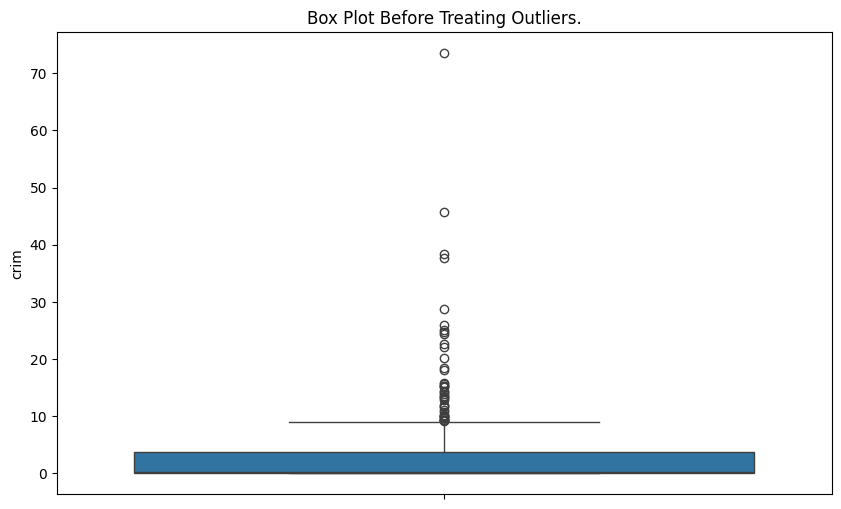

In [88]:
plt.figure(figsize=(10,6))
sbn.boxplot(feature_df)
plt.title('Box Plot Before Treating Outliers.')

# **Treating Outliers obtained via IQR**

I treated the outliers by replacing the crime rate values which were lower and upper than the lowerBound and upperBound respectively.

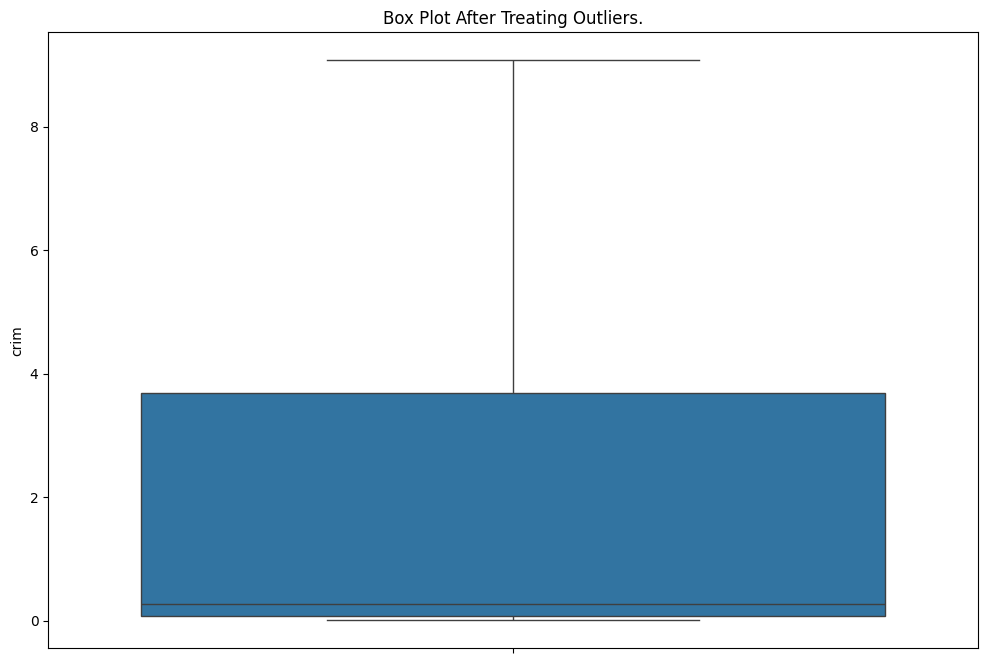

In [87]:
treated_feature = feature_df.copy()
treated_feature[(treated_feature < lowerBound)] = lowerBound
treated_feature[(treated_feature > upperBound)] = upperBound

plt.figure(figsize=(12,8))
sbn.boxplot(treated_feature)
plt.title('Box Plot After Treating Outliers.')
plt.show()